# cuSignal Cheat Sheets sample code

(c) 2020 NVIDIA, Blazing SQL

Distributed under Apache License 2.0

# Imports

In [1]:
import cusignal
import cupy as cp
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# cuSignal I/O

Data downloaded from: https://sccn.ucsd.edu/~arno/fam2data/publicly_available_EEG_data.html

#### cusignal.io.reader.read_bin()

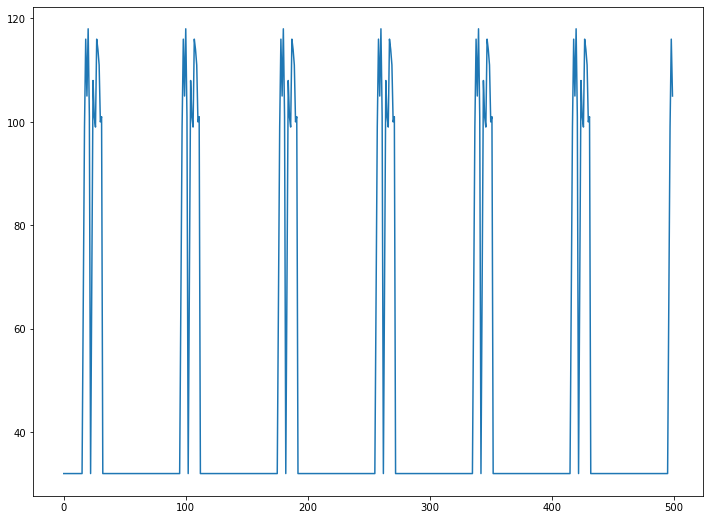

In [2]:
data_eeg = cusignal.read_bin(
    '../data/sub-01_ses-1_task-BreathCounting_eeg_SMALL.bdf'
    , dtype=cp.uint8
    , num_samples=50000
    , offset=1000
)

plt.figure(figsize=(12,9))
plt.plot(cp.asnumpy(data_eeg[0:500]))

#### cusignal.io.reader.read_sigmf()

/opt/conda/envs/rapids/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


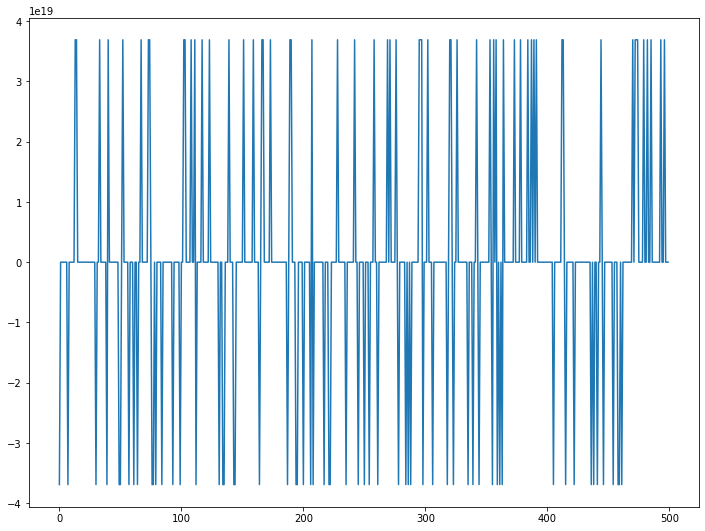

In [3]:
data_wifi = cusignal.read_sigmf(
    data_file='../data/Demod_WiFi_cable_X310_3123D76_IQ#1_run1.sigmf-data'
    , meta_file='../data/Demod_WiFi_cable_X310_3123D76_IQ#1_run1.sigmf-meta'
    , num_samples=50000
    , offset=1000
)

plt.figure(figsize=(12,9))
plt.plot(cp.asnumpy(data_wifi[0:500]))

#### cusignal.io.reader.unpack_bin()

In [4]:
cusignal.unpack_bin(
    cusignal.pack_bin(data_eeg)
    , dtype=cp.uint8
)

array([32, 32, 32, ..., 59,  1, 76], dtype=uint8)

#### cusignal.io.writer.pack_bin()

In [5]:
cusignal.pack_bin(data_eeg)

array([32, 32, 32, ..., 59,  1, 76], dtype=uint8)

#### cusignal.io.writer.write_bin()

In [6]:
cusignal.write_bin(
    '../data/sub-01_ses-1_task-BreathCounting_eeg_SMALL.bdf'
    , data_eeg
    , append=False
)

#### cusignal.io.writer.write_sigmf()

In [7]:
cusignal.write_sigmf(
    '../data/Demod_WiFi_cable_X310_3123D76_IQ#1_run1_SMALL.sigmf-data'
    , data_wifi
    , append=False
)